# Plot sea water and air temperature at Buoy "Bahia de Palma"

The temperature time series is represented for selected months and years, the months are overlaid in order to make easier the comparison.

In [1]:
%matplotlib inline
import glob
import os
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import dates
import datetime, time, calendar
import matplotlib as mpl
import locale
import matplotlib.font_manager as fm
import matplotlib.image as image
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
mpl.rcParams.update({'font.size': 20})
prop = fm.FontProperties(fname='/home/ctroupin/.fonts/Cube-Regular2.ttf')

In [2]:
figdir = "/home/ctroupin/Pictures/SOCIB"
figname = "temp_bahiadepalma_20160725" 

In [3]:
file_basename = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/"
file_list = ['buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-06.nc',
                'buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-07.nc',
                'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-06.nc',
                'buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-07.nc',
                'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-06.nc',
                'buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-07.nc']
file_list = [file_basename + s for s in file_list]

# Load data

In [96]:
def read_variable_time_list(filelist, variable_name):
    '''
    Read the variable and time from a list
    INPUTS: variable standard name and file list
    OUTPUTS: variable, time, date and year
    '''
    variable = np.array([])
    variableQC = np.array([])
    vartime = np.array([])
    vardate = np.array([])
    varyear = np.array([])
    
    for datafiles in filelist:
        print(datafiles)
        with netCDF4.Dataset(datafiles) as nc:
            vname = nc.get_variables_by_attributes(standard_name=variable_name)[0]
            varname = vname.name
            varnameQC = vname.ancillary_variables
            varnameQC = np.hstack((varnameQC, nc.variables[varnameQC][:]))
            variable = np.hstack((variable, nc.variables[varname][:]))
            time = nc.variables['time'][:]
            vartime = np.hstack((vartime, time))
            timeunits = nc.variables['time'].units
            varyear = np.hstack((varyear, netCDF4.num2date(time[0], timeunits).year * np.ones_like(time)))
    variable = np.ma.masked_where(variableQC !=1, variable)
    vardate = netCDF4.num2date(vartime, timeunits)
    
    return variable, vartime, vardate, varyear

In [97]:
buoytemperature, buoytime, buoydate, buoyyear = read_variable_time_list(file_list, 'sea_water_temperature')

http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-06.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2014/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2014-07.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-06.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37005/L1/2015/dep0002_buoy-bahiadepalma_scb-sbe37005_L1_2015-07.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37007/L1/2016/dep0001_buoy-bahiadepalma_scb-sbe37007_L1_2016-06.nc
http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_bahiadepalma-scb_sbe37007/L1/20

In [98]:
buoydate.shape

(4200,)

In [99]:
buoydate = np.array([dd.replace(year=int(buoyyear.min())) for dd in buoydate])

# Make the plot

In [100]:
colorlist = ['c', 'y', 'b']

In [101]:
im = image.imread('/home/ctroupin/Presentations/figures4presentations/logo/logo_socib_square.png')

2014.0
(0, 1271)
2015.0
(1272, 2735)
2016.0
(2736, 4199)


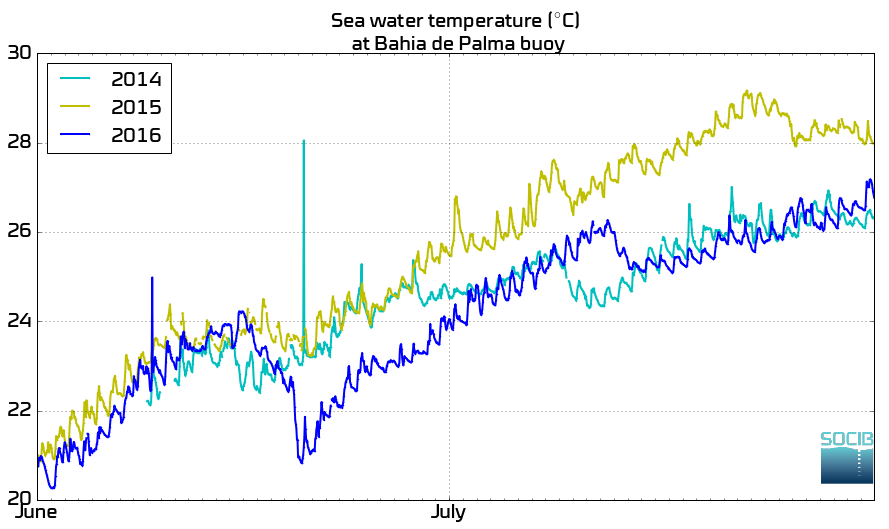

In [102]:
#mpl.rcParams['font.family'] = prop.get_name()
hfmt = dates.DateFormatter('%B')

fig, ax= plt.subplots(num=None, figsize=(15, 8))

i=0
for years in np.unique(buoyyear):
    print years
    indices = np.where(buoyyear == years)[0]
    print(indices.min(), indices.max())
    plt.plot(buoydate[indices], 
             buoytemperature[indices],
             marker = 'o',
             markeredgecolor = colorlist[i],
             color = colorlist[i], ms=1, label=int(years))
    i += 1
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.DayLocator())
ax.xaxis.set_major_formatter(hfmt)
plt.title('Sea water temperature ($^{\circ}$C)\n at Bahia de Palma buoy', fontproperties=prop)
#fig.autofmt_xdate()
hl = plt.legend(loc=2, prop=prop)
plt.grid()
newax = fig.add_axes([0.8, 0.15, 0.1, 0.1], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
# plt.savefig(os.path.join(figdir, figname), dpi=300)
plt.show()
plt.close()

In [18]:
import datetime
d = datetime.datetime.now()
d.strftime('%Y%m%d_%H%M')

'20160725_1128'